<a href="https://www.kaggle.com/code/ngarai/players-value-2021-premier-league?scriptVersionId=285458186" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Premier League Analysis

**Author: N-Garai**

## **1. Import Library and load dataset**

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib 
import sklearn
import re
import seaborn as sns

In [2]:
#leaod datset
df=pd.read_csv("/kaggle/input/premier-league-players-2021/Premier league players values 2021.csv")

In [3]:
print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"   Rows: {df.shape}, Columns: {df.shape}\n")

print("📋 Column Information:")
print(df.info())


DATASET OVERVIEW

📊 Dataset Shape: (526, 13)
   Rows: (526, 13), Columns: (526, 13)

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   League               526 non-null    object
 1   Club                 526 non-null    object
 2   #                    526 non-null    object
 3   player               526 non-null    object
 4   Position             526 non-null    object
 5   Date of birth / Age  526 non-null    object
 6   Nat.                 526 non-null    object
 7   Height               526 non-null    object
 8   Foot                 526 non-null    object
 9   Joined               526 non-null    object
 10  Signed from          526 non-null    object
 11  Contract             526 non-null    object
 12  Market value         526 non-null    object
dtypes: object(13)
memory usage: 53.5+ KB
None


In [4]:
#print first 10 row
df.head(10)

,League,Club,#,player,Position,Date of birth / Age,Nat.,Height,Foot,Joined,Signed from,Contract,Market value
0,PREMIER LEAGUE,Manchester City,31,Ederson,Goalkeeper,"Aug 17, 1993 (28)",Brazil,"1,88 m",left,"Jul 1, 2017",SL Benfica,"Jun 30, 2026",€50.00m
1,PREMIER LEAGUE,Manchester City,13,Zack Steffen,Goalkeeper,"Apr 2, 1995 (26)",United States,"1,91 m",right,"Jul 9, 2019",Columbus Crew SC,"Jun 30, 2025",€6.00m
2,PREMIER LEAGUE,Manchester City,33,Scott Carson,Goalkeeper,"Sep 3, 1985 (36)",England,"1,88 m",right,"Jul 20, 2021",Derby County,"Jun 30, 2022",€300Th.
3,PREMIER LEAGUE,Manchester City,3,Rúben Dias,Centre-Back,"May 14, 1997 (24)",Portugal,"1,87 m",right,"Sep 29, 2020",SL Benfica,"Jun 30, 2027",€75.00m
4,PREMIER LEAGUE,Manchester City,14,Aymeric Laporte,Centre-Back,"May 27, 1994 (27)",Spain,"1,89 m",left,"Jan 30, 2018",Athletic Bilbao,"Jun 30, 2025",€45.00m
5,PREMIER LEAGUE,Manchester City,6,Nathan Aké,Centre-Back,"Feb 18, 1995 (26)",Netherlands,"1,80 m",left,"Aug 5, 2020",AFC Bournemouth,"Jun 30, 2025",€32.00m
6,PREMIER LEAGUE,Manchester City,5,John Stones,Centre-Back,"May 28, 1994 (27)",England,"1,88 m",right,"Aug 9, 2016",Everton FC,"Jun 30, 2026",€30.00m
7,PREMIER LEAGUE,Manchester City,11,Oleksandr Zinchenko,Left-Back,"Dec 15, 1996 (25)",Ukraine,"1,75 m",left,"Jul 4, 2016",FK Ufa,"Jun 30, 2024",€28.00m
8,PREMIER LEAGUE,Manchester City,22,Benjamin Mendy,Left-Back,"Jul 17, 1994 (27)",France,"1,85 m",left,"Jul 24, 2017",AS Monaco,"Jun 30, 2023",€10.00m
9,PREMIER LEAGUE,Manchester City,27,João Cancelo,Right-Back,"May 27, 1994 (27)",Portugal,"1,82 m",right,"Aug 7, 2019",Juventus FC,"Jun 30, 2025",€55.00m


In [5]:
#print last 5 row
df.tail()

,League,Club,#,player,Position,Date of birth / Age,Nat.,Height,Foot,Joined,Signed from,Contract,Market value
521,PREMIER LEAGUE,Burnley FC,17,Aaron Lennon,Right Winger,"Apr 16, 1987 (34)",England,"1,65 m",right,"Aug 25, 2021",Kayserispor,"Jun 30, 2022",€1.10m
522,PREMIER LEAGUE,Burnley FC,9,Chris Wood,Centre-Forward,"Dec 7, 1991 (30)",New Zealand,"1,91 m",right,"Aug 21, 2017",Leeds United,"Jun 30, 2023",€8.00m
523,PREMIER LEAGUE,Burnley FC,19,Jay Rodríguez,Centre-Forward,"Jul 29, 1989 (32)",England,"1,85 m",right,"Jul 9, 2019",West Bromwich Albion,"Jun 30, 2022",€4.00m
524,PREMIER LEAGUE,Burnley FC,10,Ashley Barnes,Centre-Forward,"Oct 30, 1989 (32)",England,"1,86 m",right,"Jan 10, 2014",Brighton & Hove Albion,"Jun 30, 2022",€3.50m
525,PREMIER LEAGUE,Burnley FC,27,Matej Vydra,Centre-Forward,"May 1, 1992 (29)",Czech Republic,"1,80 m",right,"Aug 7, 2018",Derby County,"Jun 30, 2022",€3.00m


In [6]:
df.describe(include="all")

,League,Club,#,player,Position,Date of birth / Age,Nat.,Height,Foot,Joined,Signed from,Contract,Market value
count,526,526,526,526,526,526,526,526,526,526,526,526,526
unique,1,20,53,500,13,477,63,39,4,233,197,10,66
top,PREMIER LEAGUE,Manchester United,10,Marc Guehi,Centre-Back,"Feb 10, 1994 (27)",England,"1,80 m",right,"Jul 1, 2021",Southampton FC,"Jun 30, 2023",€3.00m
freq,526,33,20,2,100,3,191,44,382,28,11,131,30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   League               526 non-null    object
 1   Club                 526 non-null    object
 2   #                    526 non-null    object
 3   player               526 non-null    object
 4   Position             526 non-null    object
 5   Date of birth / Age  526 non-null    object
 6   Nat.                 526 non-null    object
 7   Height               526 non-null    object
 8   Foot                 526 non-null    object
 9   Joined               526 non-null    object
 10  Signed from          526 non-null    object
 11  Contract             526 non-null    object
 12  Market value         526 non-null    object
dtypes: object(13)
memory usage: 53.5+ KB


In [8]:
print(df["Market value"])

0      €50.00m
1       €6.00m
2      €300Th.
3      €75.00m
4      €45.00m
        ...   
521     €1.10m
522     €8.00m
523     €4.00m
524     €3.50m
525     €3.00m
Name: Market value, Length: 526, dtype: object


## **2. Data Preprocessing**

In [9]:
#1.Get age
df['Age'] = df['Date of birth / Age'].str.extract(r'\((\d+)\)').astype(int)
print(df['Age'])

0      28
1      26
2      36
3      24
4      27
       ..
521    34
522    30
523    32
524    32
525    29
Name: Age, Length: 526, dtype: int64


In [10]:
# 2. Clean and convert 'Height' to numerical (float in meters)
df['Height'] = df['Height'].astype(str).str.replace(' m', '').str.replace(',', '.').astype(float)
print(df['Height'])

0      1.88
1      1.91
2      1.88
3      1.87
4      1.89
       ... 
521    1.65
522    1.91
523    1.85
524    1.86
525    1.80
Name: Height, Length: 526, dtype: float64


In [11]:
# 3. Clean and convert 'Market value' to numerical (float in millions of Euros)
def clean_market_value(value):
    if isinstance(value, str):
        if value == '-': # Handle '-' values by returning NaN
            return np.nan
        value = value.replace('€', '').strip()
        if 'm' in value:
            return float(value.replace('m', ''))
        elif 'Th.' in value:
            return float(value.replace('Th.', '')) / 1000
    return float(value)
df['Market value(numerical)'] = df['Market value'].apply(clean_market_value)

print(df['Market value(numerical)'])

0      50.0
1       6.0
2       0.3
3      75.0
4      45.0
       ... 
521     1.1
522     8.0
523     4.0
524     3.5
525     3.0
Name: Market value(numerical), Length: 526, dtype: float64


In [12]:
#Print info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   League                   526 non-null    object 
 1   Club                     526 non-null    object 
 2   #                        526 non-null    object 
 3   player                   526 non-null    object 
 4   Position                 526 non-null    object 
 5   Date of birth / Age      526 non-null    object 
 6   Nat.                     526 non-null    object 
 7   Height                   526 non-null    float64
 8   Foot                     526 non-null    object 
 9   Joined                   526 non-null    object 
 10  Signed from              526 non-null    object 
 11  Contract                 526 non-null    object 
 12  Market value             526 non-null    object 
 13  Age                      526 non-null    int64  
 14  Market value(numerical)  5

In [13]:
#Handle Missing value
df_clean=df.dropna(subset=['Market value(numerical)'],axis=0,inplace=True)
print(df_clean)
df.info()

None
<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 0 to 525
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   League                   524 non-null    object 
 1   Club                     524 non-null    object 
 2   #                        524 non-null    object 
 3   player                   524 non-null    object 
 4   Position                 524 non-null    object 
 5   Date of birth / Age      524 non-null    object 
 6   Nat.                     524 non-null    object 
 7   Height                   524 non-null    float64
 8   Foot                     524 non-null    object 
 9   Joined                   524 non-null    object 
 10  Signed from              524 non-null    object 
 11  Contract                 524 non-null    object 
 12  Market value             524 non-null    object 
 13  Age                      524 non-null    int64  
 14  Market value(numerical)  5

In [14]:
#Descriptive Statistic
print("Descriptive statistics for numerical columns ('Age', 'Height', 'Market value(numerical)'):")
print(df[['Age', 'Height', 'Market value(numerical)']].describe())

Descriptive statistics for numerical columns ('Age', 'Height', 'Market value(numerical)'):
              Age      Height  Market value(numerical)
count  524.000000  524.000000               524.000000
mean    26.417939    1.831393                17.329389
std      4.318901    0.068990                19.610741
min     17.000000    1.630000                 0.200000
25%     23.000000    1.780000                 3.500000
50%     26.000000    1.830000                10.000000
75%     29.000000    1.880000                22.500000
max     38.000000    2.040000               120.000000


## **3.Univariate Analysis of numerical feature**

> To visualize distribution of Market value(numerical) and Age

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


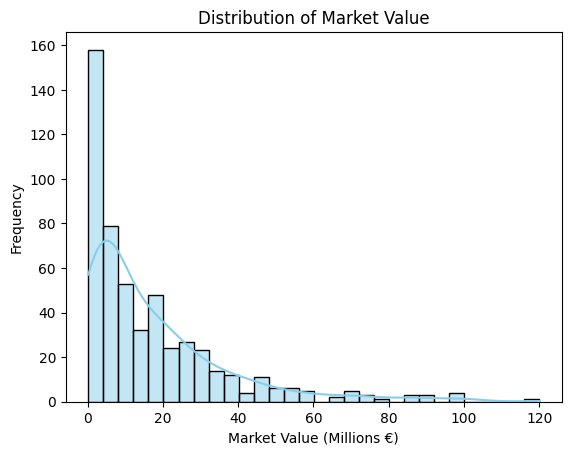

In [19]:
import matplotlib.pyplot as plt
# Plot 1: Histogram for Market value
sns.histplot(df['Market value(numerical)'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Market Value')
plt.xlabel('Market Value (Millions €)')
plt.ylabel('Frequency')
plt.show()

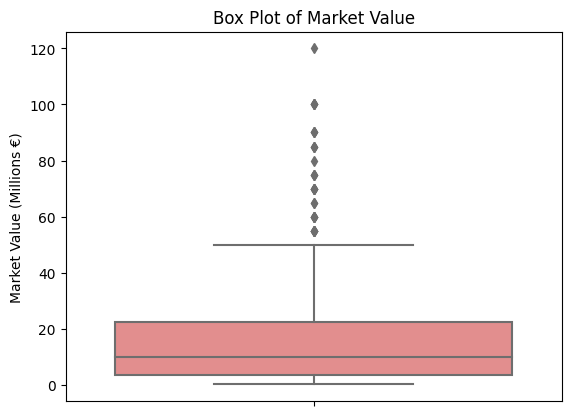

In [21]:
# Plot 2: Box plot for Market value
sns.boxplot(y=df['Market value(numerical)'], color='lightcoral')
plt.title('Box Plot of Market Value')
plt.ylabel('Market Value (Millions €)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


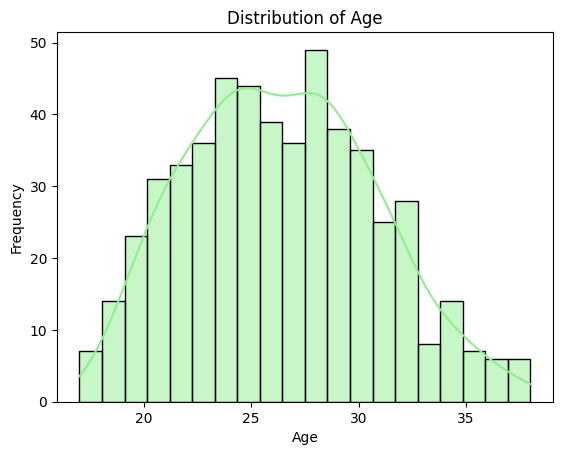

In [23]:
# Plot : Histogram for Age
sns.histplot(df['Age'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

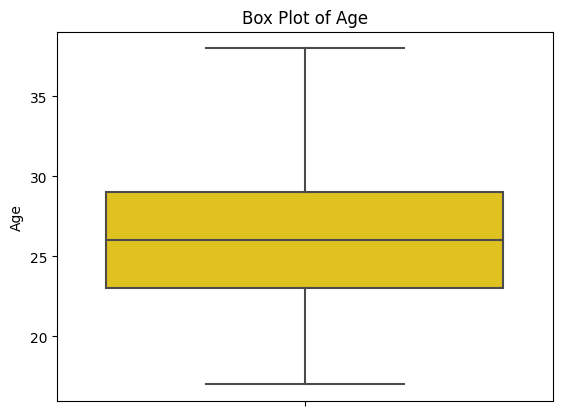

In [24]:
# Plot : Box plot for Age
sns.boxplot(y=df['Age'], color='gold')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

## 4. Univariate Analysis of Categorical Feature


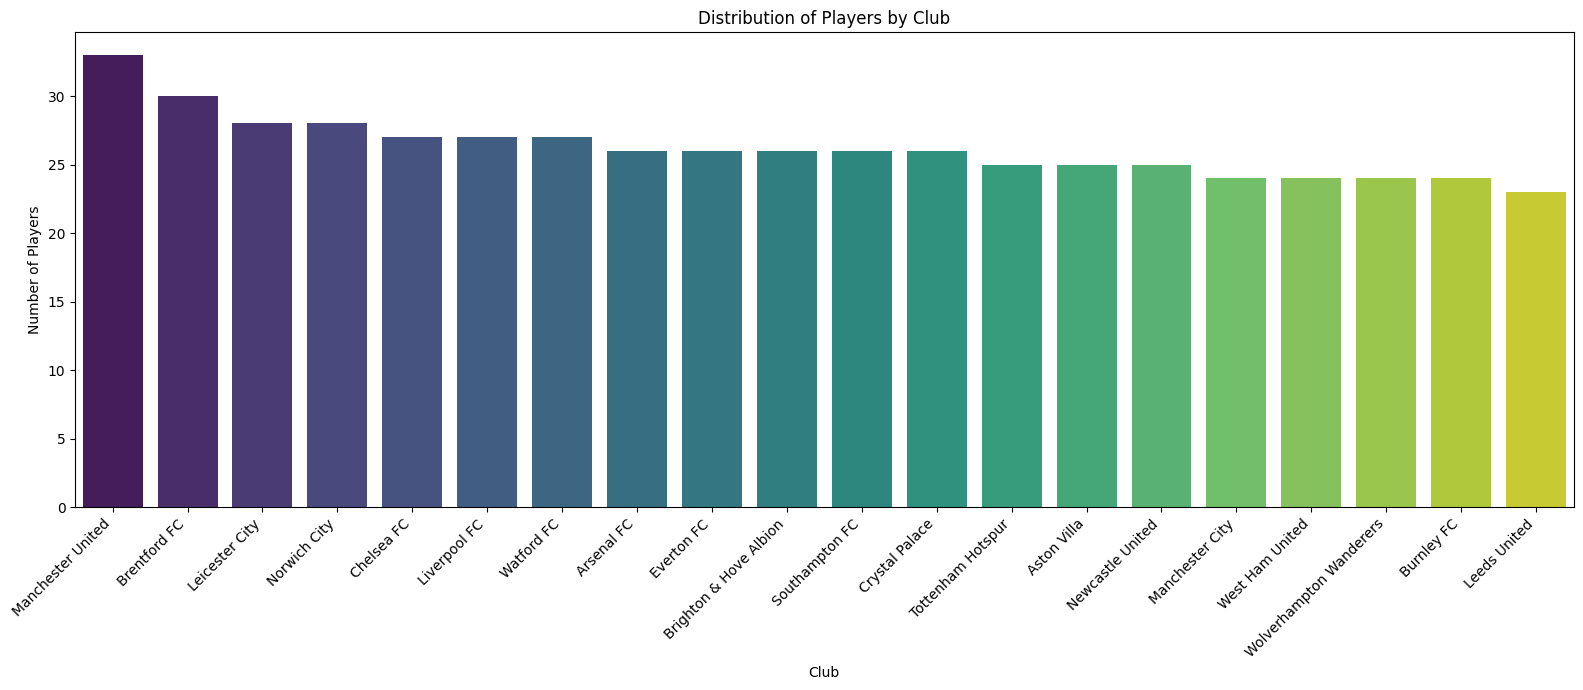

In [27]:
# 1. Distribution of 'Club'
plt.figure(figsize=(16, 7))
sns.countplot(data=df, x='Club', palette='viridis', order=df['Club'].value_counts().index)
plt.title('Distribution of Players by Club')
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

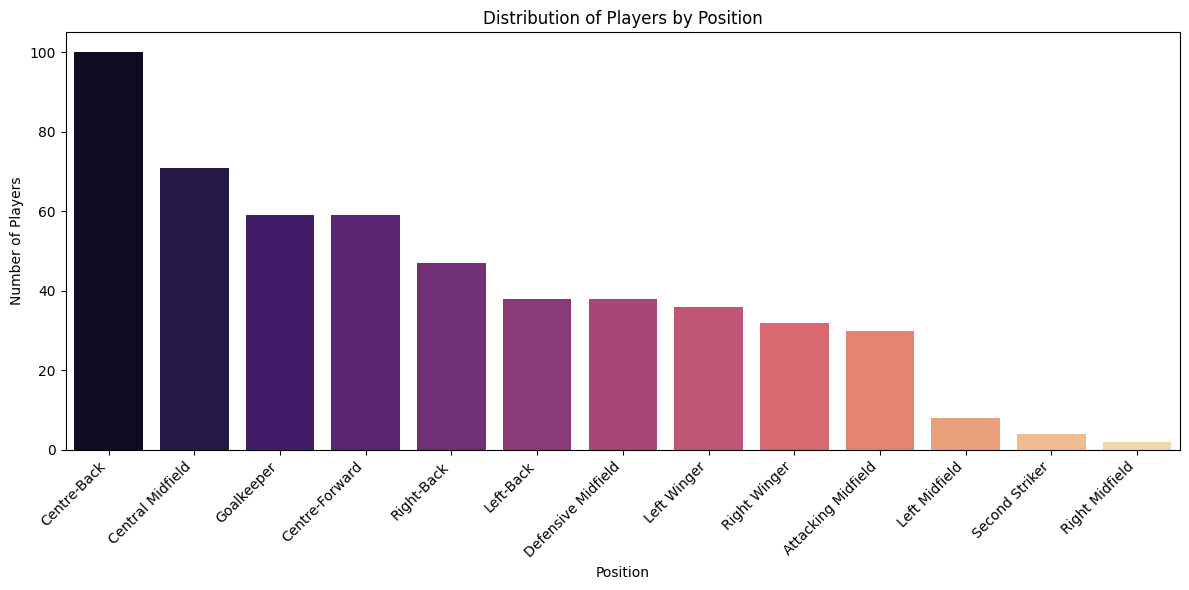

In [29]:
# 2. Distribution of 'Position'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Position', palette='magma', order=df['Position'].value_counts().index)
plt.title('Distribution of Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

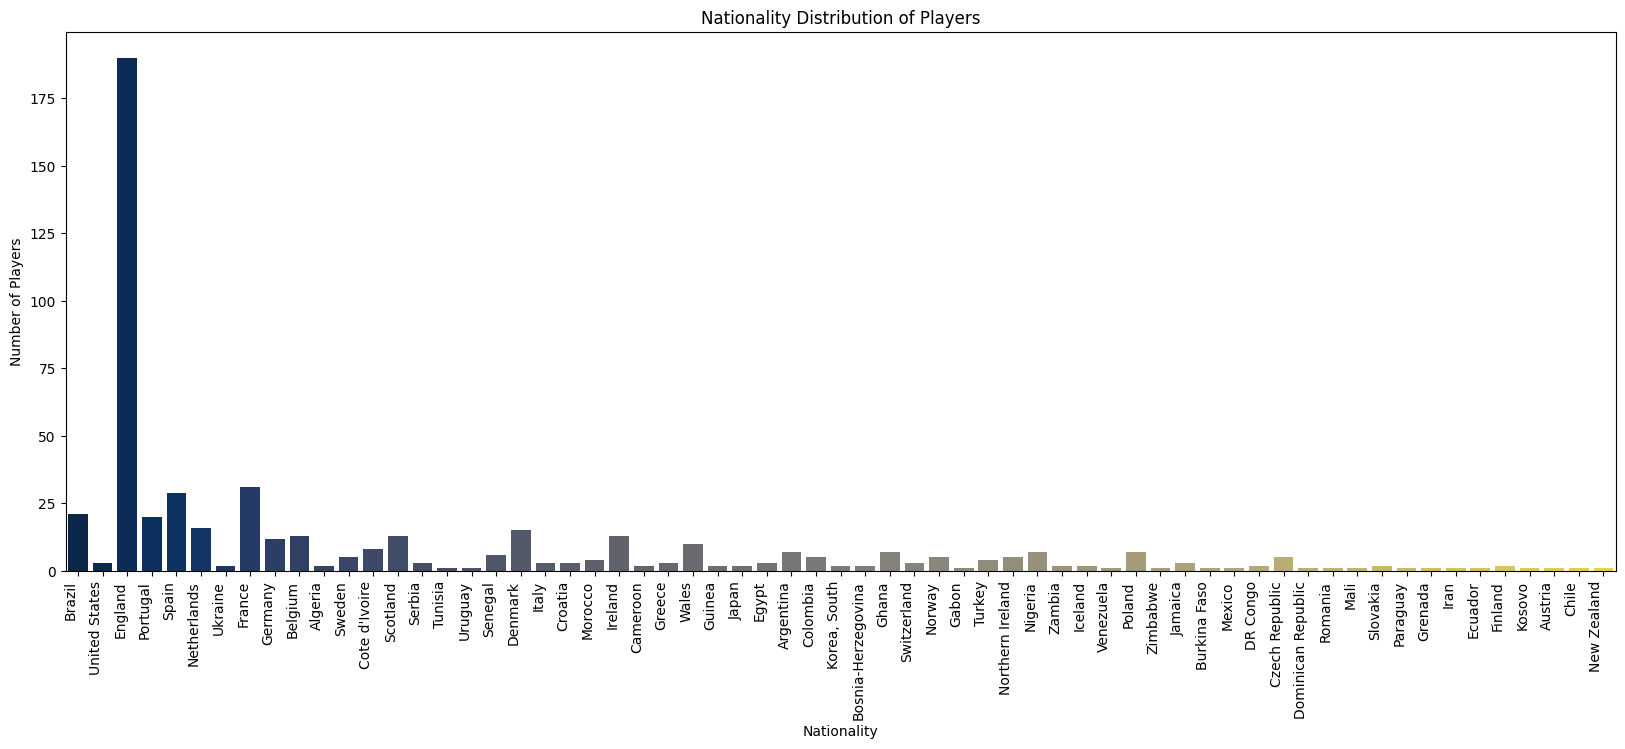

In [36]:
# 3. Distribution of 'Nat.' (Nationality)
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='Nat.', palette='cividis')
plt.title('Nationality Distribution of Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=90, ha='right')

plt.show()

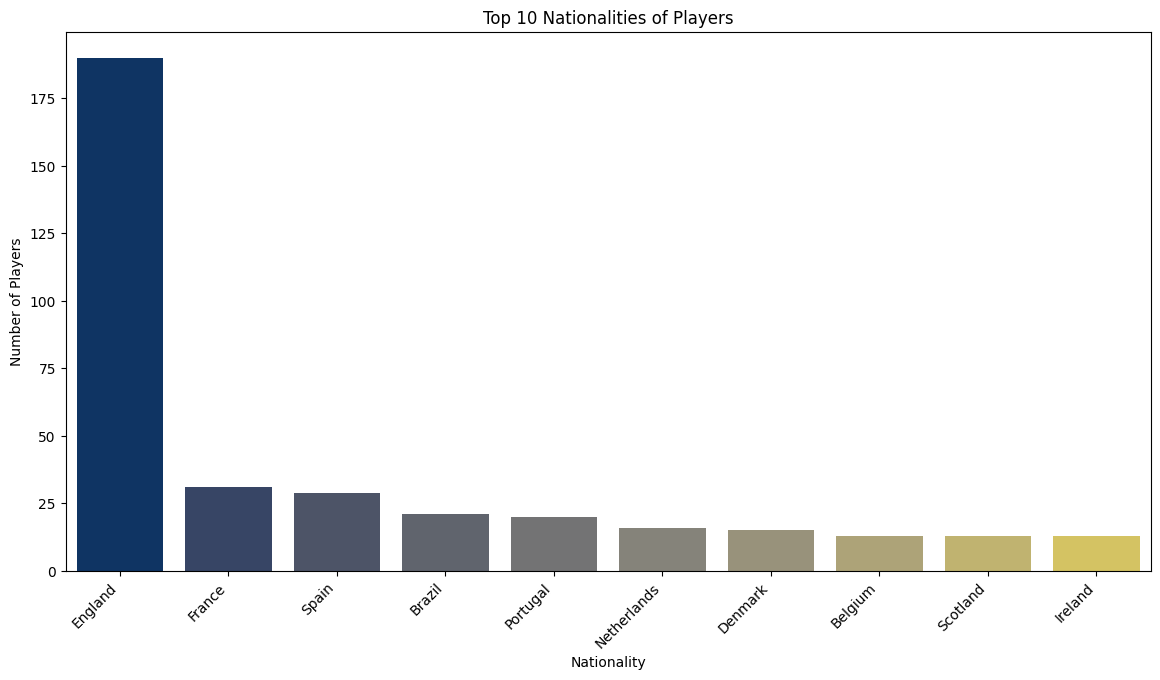

In [37]:
# 3.1--- Distribution of 'Nat.' (Nationality)
# Selecting top 10 nationalities for better visualization
top_10_nat = df['Nat.'].value_counts().head(10).index
plt.figure(figsize=(14, 7))
sns.countplot(data=df[df['Nat.'].isin(top_10_nat)], x='Nat.', palette='cividis', order=top_10_nat)
plt.title('Top 10 Nationalities of Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.show()

## 5. Bivariate Analysis

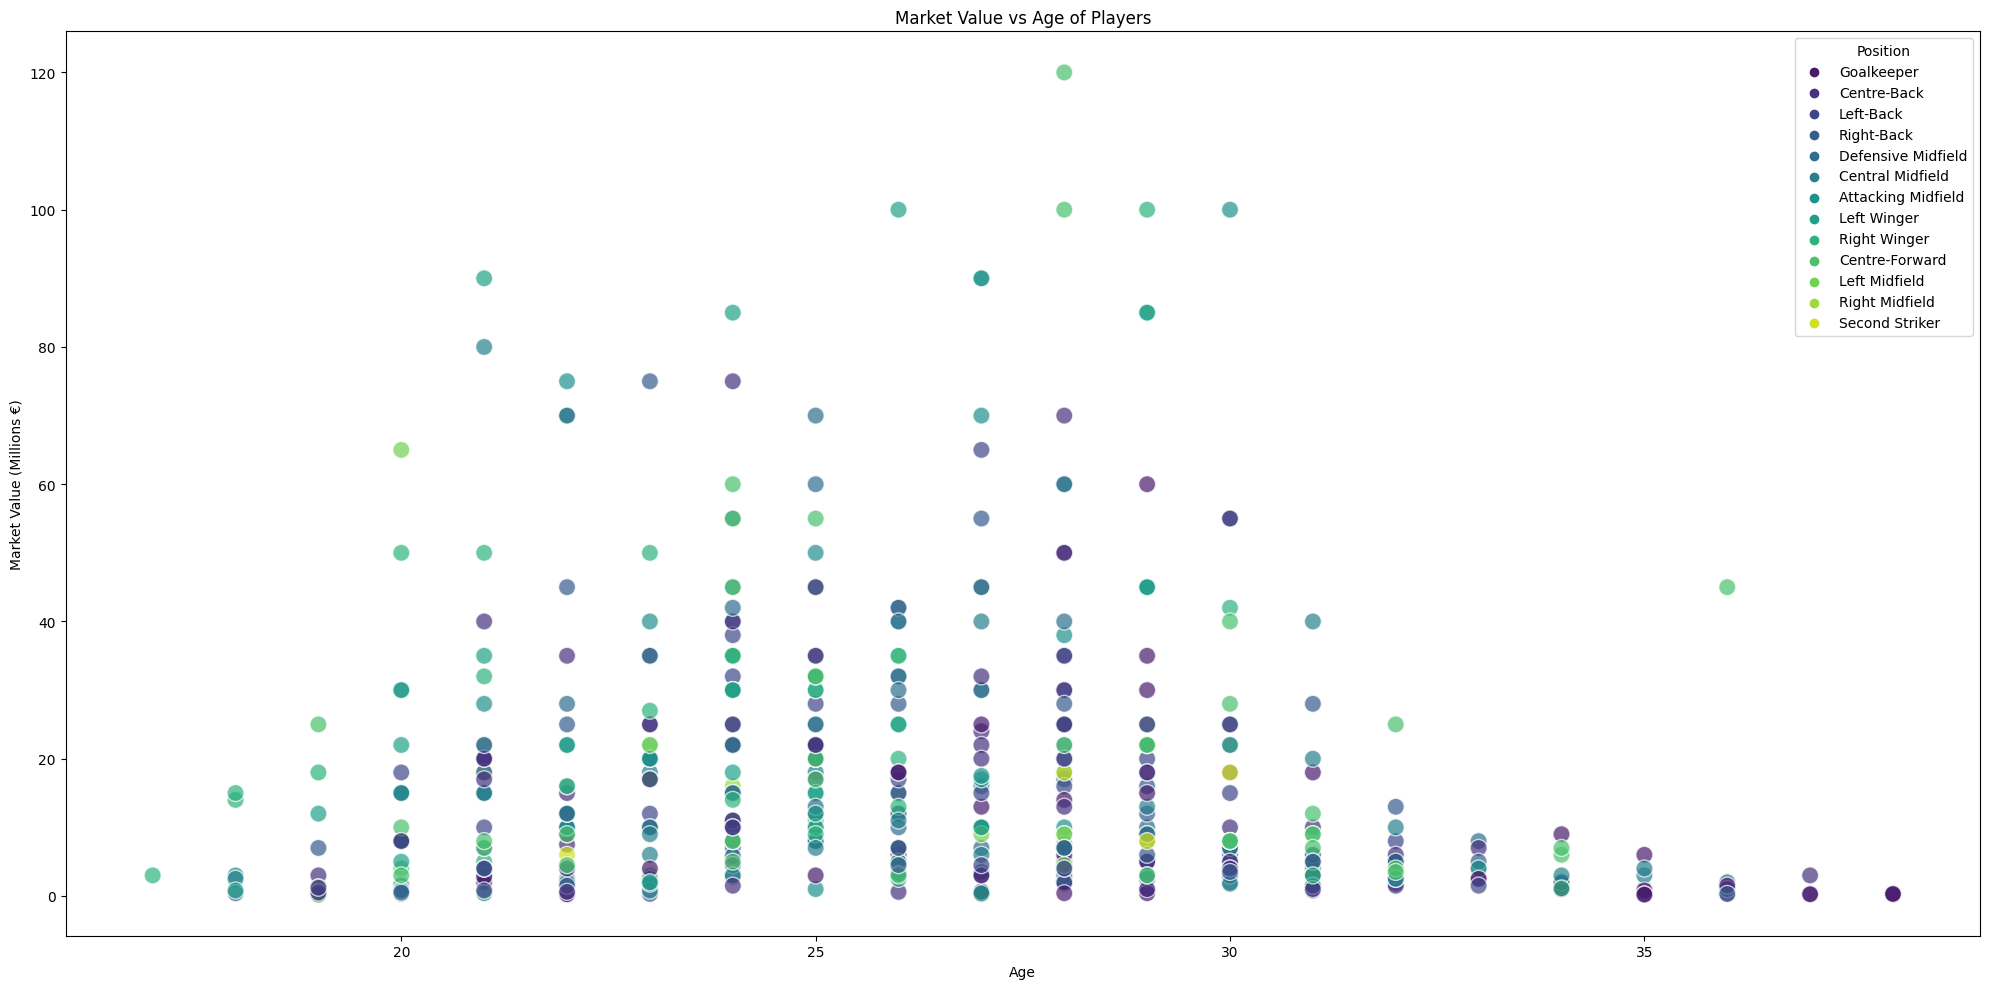

In [41]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x='Age', y='Market value(numerical)',s=150, hue='Position', palette='viridis', alpha=0.7)

plt.title('Market Value vs Age of Players')
plt.xlabel('Age')
plt.ylabel('Market Value (Millions €)')
plt.tight_layout()
plt.show()
